In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

#plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


Tiputetaan turhat muuttujat pois.

In [4]:
df=df.drop(['Name', 'Year', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2', 'Origin.Eq.3', 'GallonsPer100MilesTo1981'], axis=1)

In [5]:
df.head()

,GallonsPer100Miles,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
0,5.555556,18.0,8,3.07,1.30,3.504,12.0
1,6.666667,15.0,8,3.50,1.65,3.693,11.5
2,5.555556,18.0,8,3.18,1.50,3.436,11.0
3,6.250000,16.0,8,3.04,1.50,3.433,12.0
4,5.882353,17.0,8,3.02,1.40,3.449,10.5


In [6]:
df.agg(['min', 'max'])

,GallonsPer100Miles,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
min,2.145923,9.0,3,0.68,0.46,1.613,8.0
max,11.111111,46.6,8,4.55,2.30,5.140,24.8


<Axes: >

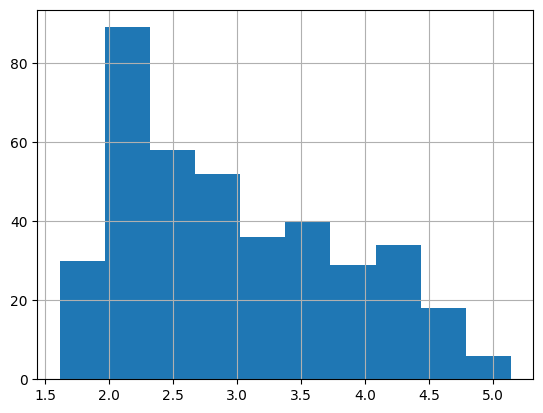

In [7]:
df['Weight1000lb'].hist()

<Axes: >

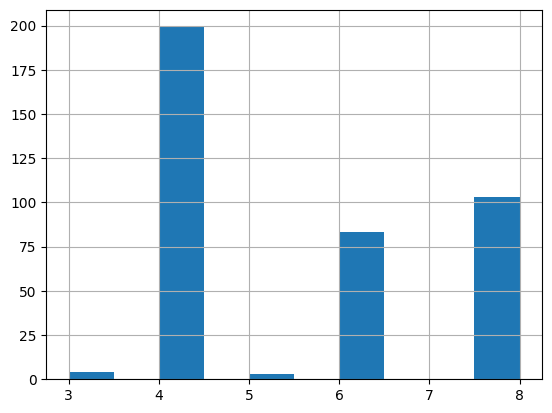

In [8]:
df['Cylinders'].hist()

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

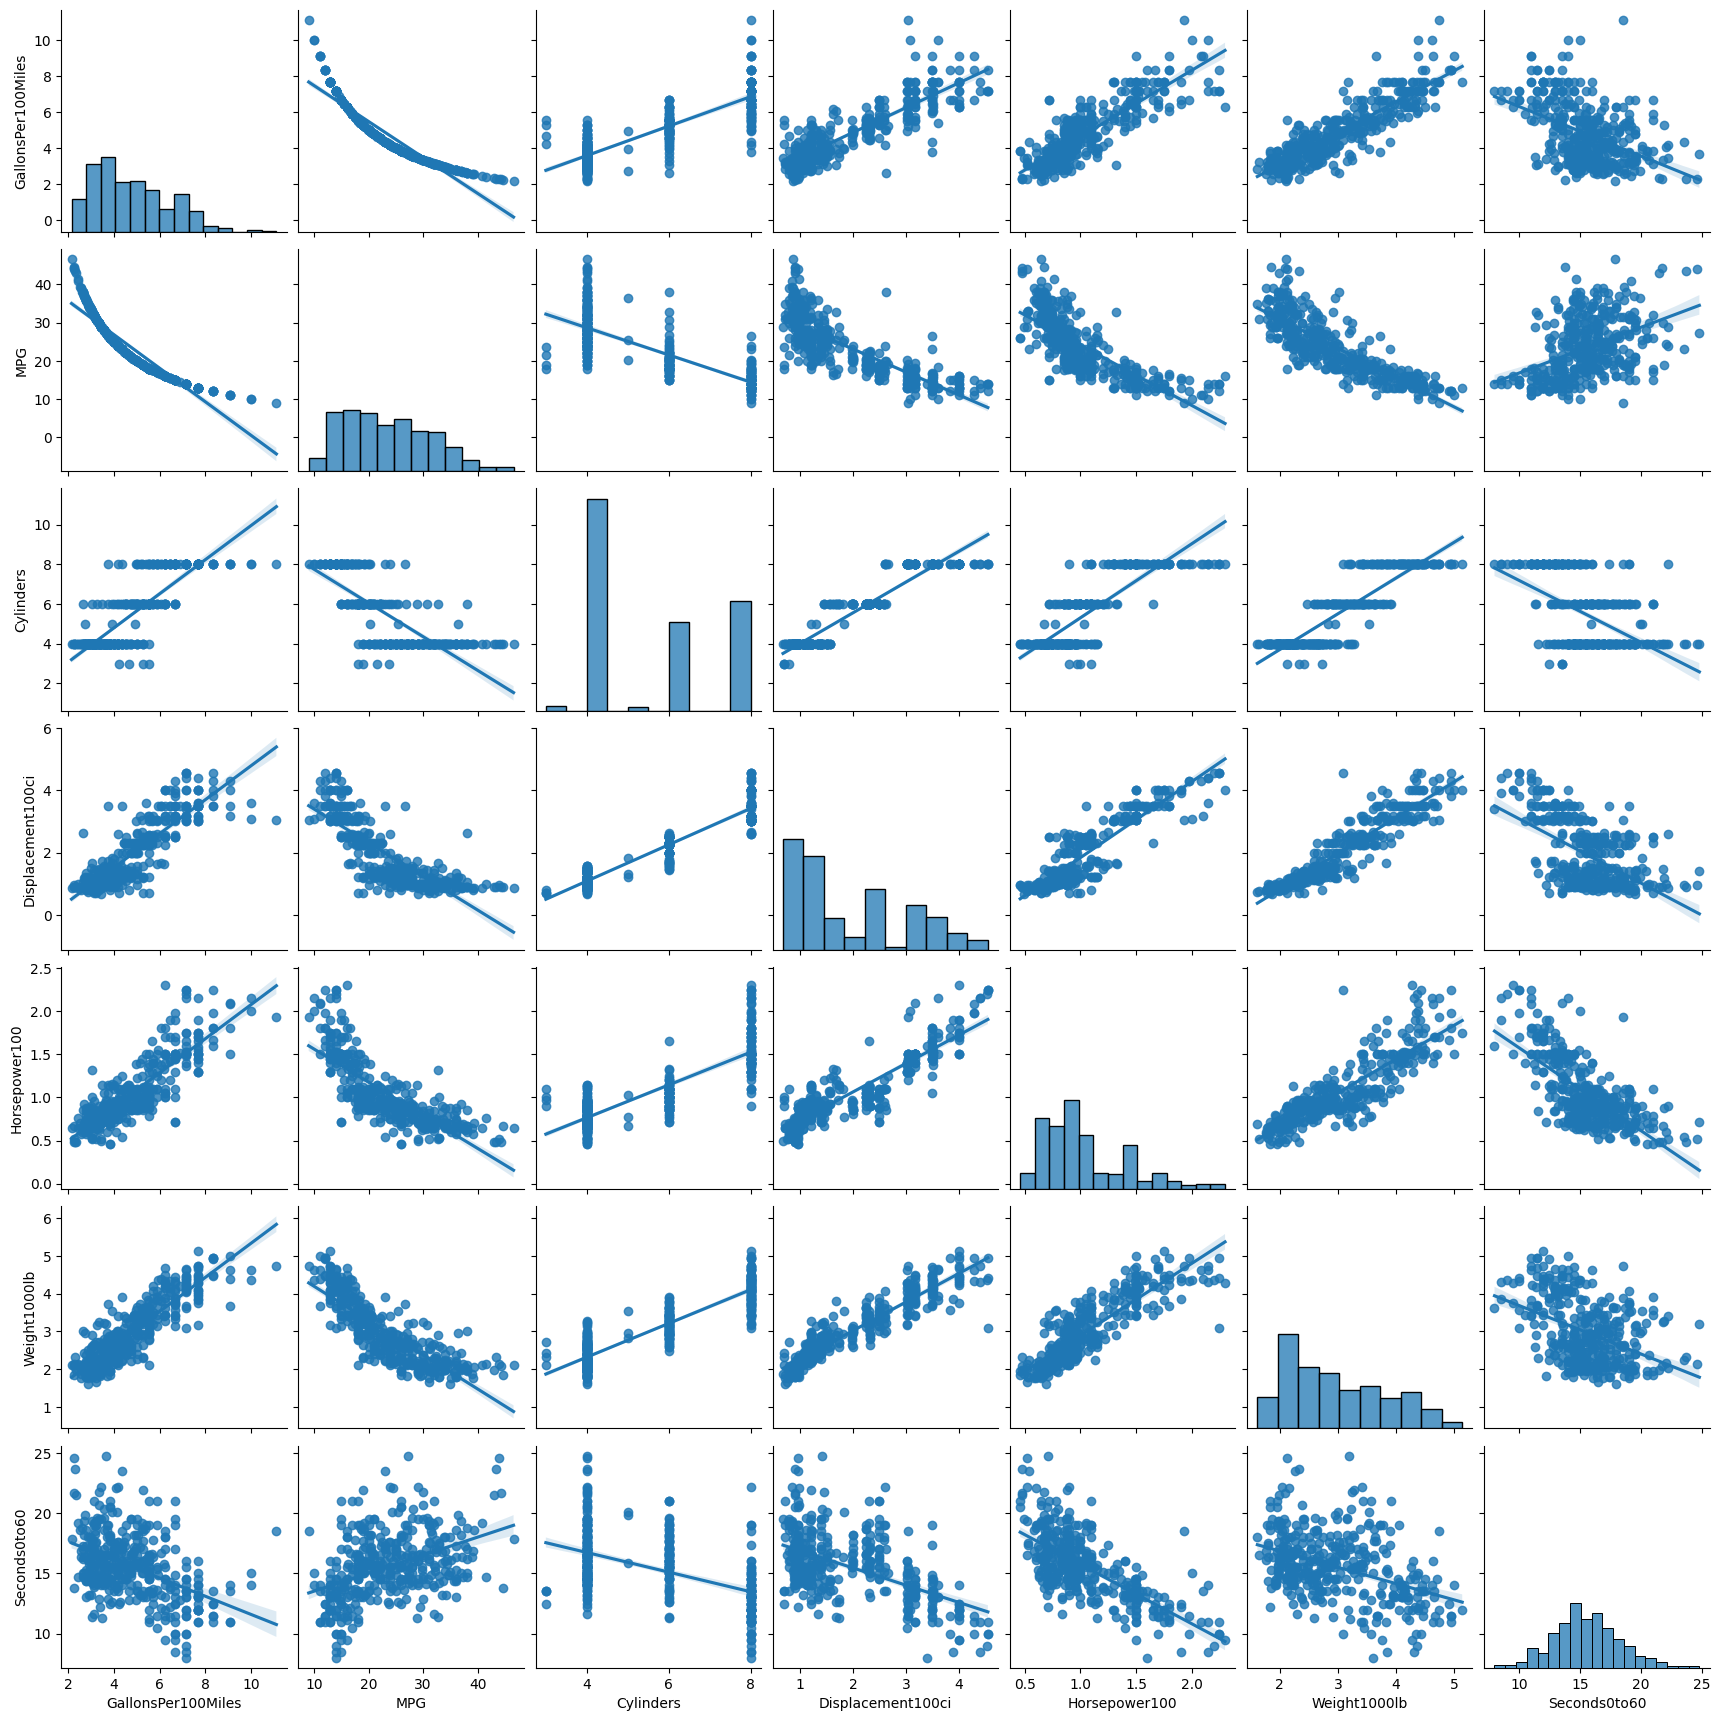

In [9]:
# let's see the scatter plots and have the regression line fitted also for illustrations
sns.pairplot(df, kind = 'reg')

Kuvista näkee nopealla vilkaiisulla aika hyvin dataa, mutta kyllä kunnon numero matriisin kanssa on kivempi pelata, siitä kuitenkin saa "kovaa dataa" suoraan.

In [10]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,GallonsPer100Miles,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
GallonsPer100Miles,1.000000,-0.935935,0.839385,0.866050,0.854809,0.885056,-0.456338
MPG,-0.935935,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
Cylinders,0.839385,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
Displacement100ci,0.866050,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
Horsepower100,0.854809,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
Weight1000lb,0.885056,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
Seconds0to60,-0.456338,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


# Aletaan tutkimaan Gallons Per 100 Miles muuttujaa muiden kanssa  

### Cylinders

In [11]:
x=df['Cylinders'].to_frame()
Y = df['GallonsPer100Miles']

Unohdin käyttää x:n kohdalla .to_frame() joten oli ongelmia LinearRegressionin kanssa.  
Tämän vuoksi tulostin shapet ulos, jotta voin etsiä ratkaisua tehokkaammin.

In [12]:
x.shape

(392, 1)

In [13]:
Y.shape

(392,)

In [14]:
model1=LinearRegression().fit(x,Y)

In [15]:
model1.coef_

array([0.81879613])

Mielenkiintosta kuinka Matriisissa coef on 0.839 ja nyt se on vaan 0.818  
Selitys:  
!['Learning is fun!'](Learning_is_fun.png)

In [16]:
Y_pred=model1.predict(x)

Text(0, 0.5, 'Gallons per 100 miles')

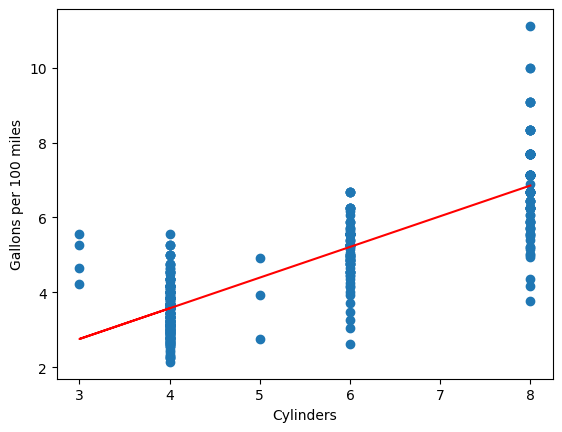

In [17]:
plt.scatter(x,Y)
plt.plot(x,Y_pred, 'r')
plt.xlabel('Cylinders')
plt.ylabel('Gallons per 100 miles')

In [18]:
print(model1.score(x,Y))

0.7045664212117797


### Displacement

In [19]:
x1=df['Displacement100ci'].to_frame()

In [20]:
model2=LinearRegression().fit(x1,Y)

In [21]:
model2.coef_

array([1.37710551])

In [22]:
Y_pred1=model2.predict(x1)

Text(0, 0.5, 'Gallons per 100 miles')

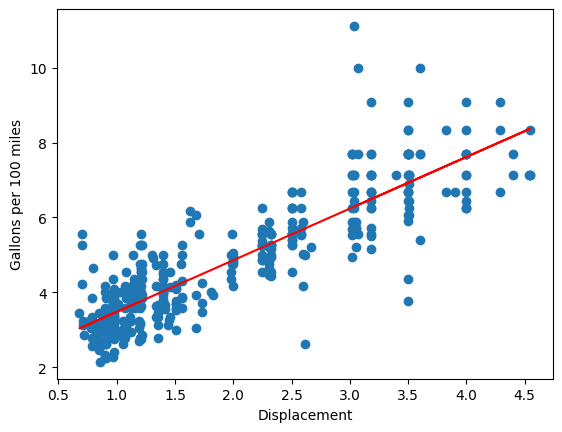

In [23]:
plt.scatter(x1,Y)
plt.plot(x1,Y_pred1, 'r')
plt.xlabel('Displacement')
plt.ylabel('Gallons per 100 miles')

In [24]:
print(model2.score(x1,Y))

0.7500424018659728


Scoren selitys:  
!['Matikkaa wahoo!'](maths.png)

### Horsepower

In [25]:
x2=df['Horsepower100'].to_frame()

In [26]:
model3=LinearRegression().fit(x2,Y)

In [27]:
model3.coef_

array([3.69527283])

In [28]:
Y_pred2=model3.predict(x2)

Text(0, 0.5, 'Gallons per 100 miles')

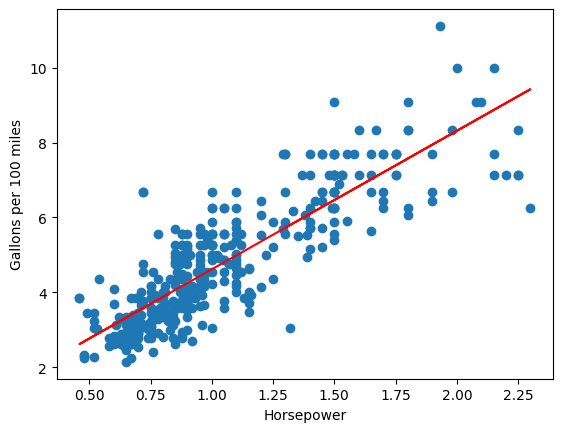

In [29]:
plt.scatter(x2,Y)
plt.plot(x2, Y_pred2, 'r')
plt.xlabel('Horsepower')
plt.ylabel('Gallons per 100 miles')

In [30]:
print(model3.score(x2,Y))

0.7306976406434581


### Weight

In [31]:
x3=df['Weight1000lb'].to_frame()

In [32]:
model4=LinearRegression().fit(x3,Y)

In [33]:
model4.coef_

array([1.73378735])

In [34]:
Y_pred3=model4.predict(x3)

Text(0, 0.5, 'Gallons per 100 miles')

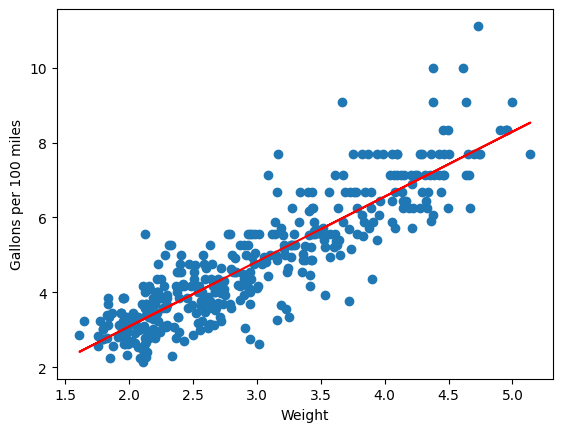

In [35]:
plt.scatter(x3,Y)
plt.plot(x3,Y_pred3, 'r')
plt.xlabel('Weight')
plt.ylabel('Gallons per 100 miles')

In [36]:
print(model4.score(x3,Y))

0.7833240828863839


### Acceleration

In [37]:
x4=df['Seconds0to60'].to_frame()

In [38]:
model5=LinearRegression().fit(x4,Y)

In [39]:
model5.coef_

array([-0.27522948])

In [40]:
x4.shape

(392, 1)

In [41]:
Y.shape

(392,)

In [42]:
Y_pred4=model5.predict(x4)

Text(0, 0.5, 'Gallons per 100 miles')

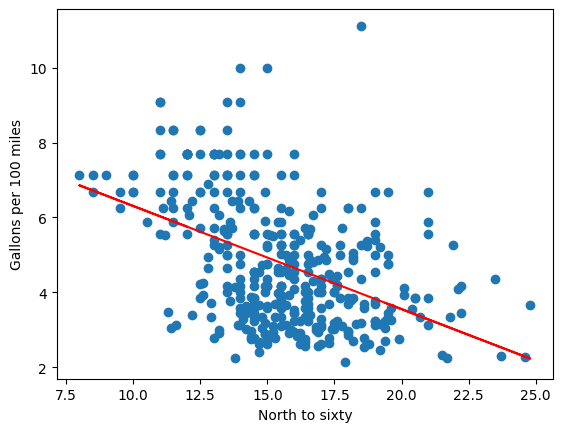

In [43]:
plt.scatter(x4,Y)
plt.plot(x4,Y_pred4, 'r')
plt.xlabel('North to sixty')
plt.ylabel('Gallons per 100 miles')

In [44]:
print(model5.score(x4,Y))

0.20824433906163253


In [45]:
# Let's prepare the data for the regression model
X = df['Weight1000lb'].to_frame()  # to_frame() makes it dataframe as now it would only be a Series!

# This is the independent variable -> you could have taken more variables into your model as there can be more than one dependent variables

In [46]:
y = df['GallonsPer100Miles']  # This is your dependent variable - or the target variable that you want to predict 

In [47]:
# Now that we have the data, let's start training the model

In [48]:


fuel_model = LinearRegression().fit(X,y)

In [49]:
fuel_model.coef_

array([1.73378735])

In [50]:
fuel_model.intercept_

-0.3802549901551391

In [51]:
# Let's just predict first that how many GallonsPer100Miles would it take based on the model if the car would weight 1000lb
fuel_model.predict(pd.DataFrame([3]))   # This value is on the interpolation range

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.82110705])

In [52]:
fuel_model.predict(pd.DataFrame([1]))   # This value is on the extrapolation range

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.35353236])

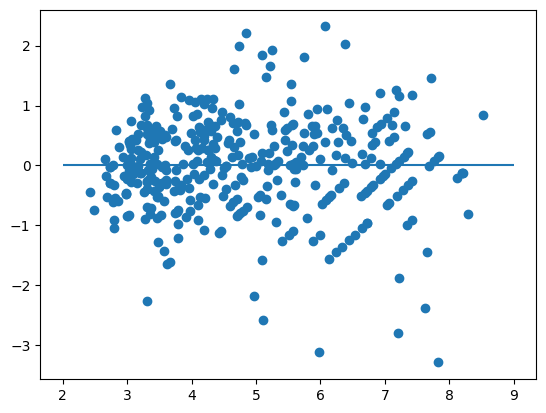

In [53]:
#Let's plot the model error terms as a scatterplot
# X = Weight1000lb
# y = GallonsPer100Miles
plt.scatter(fuel_model.predict(X), fuel_model.predict(X)-y)

plt.hlines(y=0,xmin=2,xmax=9)


In [54]:
#Coefficient of determination
fuel_model.score(X,y)

0.7833240828863839

In [55]:
# Hence, the model explains 78.3% of fuel consumtion

In [65]:
y = df['GallonsPer100Miles']
X1 = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]
X4=df[['Weight1000lb', 'Seconds0to60', 'Cylinders']]
X5=df[['Weight1000lb', 'Horsepower100', 'Cylinders']]
X6=df[['Weight1000lb', 'Displacement100ci', 'Seconds0to60']]
X7=df[['Weight1000lb', 'Displacement100ci', 'Horsepower100']]
X8=df[['Displacement100ci', 'Horsepower100', 'Cylinders']]
X9=df[['Displacement100ci', 'Seconds0to60', 'Cylinders']]
X10=df[['Cylinders', 'Seconds0to60', 'Horsepower100']]
x11=df[['Weight1000lb', 'Horsepower100', 'Seconds0to60']]


In [66]:
#from sklearn.linear_model import LinearRegression

fuel_model1 = LinearRegression().fit(X1,y)
fuel_model2 = LinearRegression().fit(X2,y)
fuel_model3 = LinearRegression().fit(X3,y)
fuel_model4=LinearRegression().fit(X4,y)
fuel_model5=LinearRegression().fit(X5,y)
fuel_model6=LinearRegression().fit(X6,y)
fuel_model7=LinearRegression().fit(X7,y)
fuel_model8=LinearRegression().fit(X8,y)
fuel_model9=LinearRegression().fit(X9,y)
fuel_model10=LinearRegression().fit(X10,y)
fuel_model11=LinearRegression().fit(x11, y)

In [68]:
#fuel_model1.predict(X1)
print(fuel_model1.score(X1,y))
print(fuel_model2.score(X2,y))
print(fuel_model3.score(X3,y))
print(fuel_model4.score(X4,y))
print(fuel_model5.score(X5,y))
print(fuel_model6.score(X6,y))
print(fuel_model7.score(X7,y))
print(fuel_model8.score(X8,y))
print(fuel_model9.score(X9,y))
print(fuel_model10.score(X10,y))
print(fuel_model11.score(x11,y))

0.8207948199718269
0.8158213878482583
0.7529103569205208
0.7981758929166383
0.8176921365228299
0.7982615176671357
0.8158213878482583
0.7852260524075363
0.7529103569205208
0.7998582918652755
0.8172961232321211


## Parhaat  
X5 = Weight, Horsepower, Cylinders  
X7 = weight, Displacement, Horsepower  
x11 = Weight, Horsepower, Acceleration

In [69]:
print(fuel_model5.score(X5,y))
print(fuel_model7.score(X7,y))
print(fuel_model11.score(x11,y))

0.8176921365228299
0.8158213878482583
0.8172961232321211


## Ero huonoimman ja parhaimpien mallien ennustusten välillä  
X5=df[['Weight1000lb', 'Horsepower100', 'Cylinders']]  
X7=df[['Weight1000lb', 'Displacement100ci', 'Horsepower100']]  
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]

In [60]:
fuel_model3.predict([[4, 1.5, 8], [6, 2, 6]])

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.95732192, 4.82763339])

In [61]:
fuel_model7.predict([[4.0, 1.5, 8.0], [6.0, 2.0, 6.0]])

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.54427135, 14.86321499])

In [62]:
fuel_model5.predict([[4, 1.5, 8], [6, 2, 6]])

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.71168334, 9.12626033])

In [63]:
df.head()

,GallonsPer100Miles,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
0,5.555556,18.0,8,3.07,1.30,3.504,12.0
1,6.666667,15.0,8,3.50,1.65,3.693,11.5
2,5.555556,18.0,8,3.18,1.50,3.436,11.0
3,6.250000,16.0,8,3.04,1.50,3.433,12.0
4,5.882353,17.0,8,3.02,1.40,3.449,10.5
